This is an exercise to implement Adaline and Madaline networks from scratch.

Here you can see the architecture of **Adaline** Network

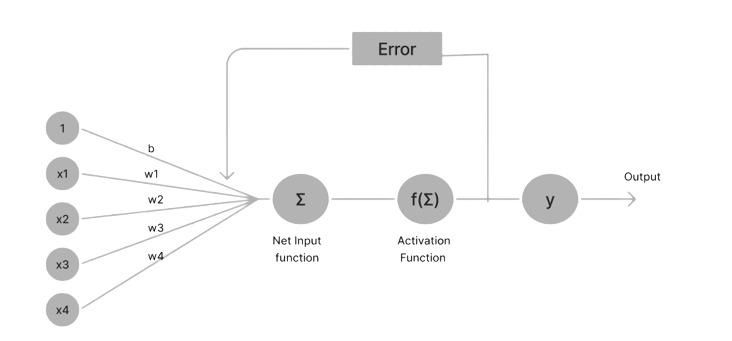

**$x$** : Input array

**$W$** : Weight matrix

$b$ : Bias

$f$ : Activation function

$y$ : Output

$\hat{y}$ : Predicted output

$J$ : Const function

$e$ : Loss functiono

$$ \hat{y} = f(\underline{\underline{W}}.\underline{x} +\underline{b}) $$

$$e(x) = y - f(x) = y - \hat{y} -> MSE (Mean Squered Error) $$

$$J = \frac{1}{n} \sum{e^2(x)} $$

$$ W := W - \alpha . \frac {\partial J}{\partial w_{ij}} -> Optimization function$$ 

Libraries

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pylab as plt
import os
import tensorflow as tf
import pandas as pd
from IPython.display import clear_output

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data


Additional Functins and classes

In [2]:
def fix_cats(df,show=False):
    '''

    Function that will Create dummy features for the given datafreame.

    It turns features with non-number intput into columuns containig
    0s and 1s for each class in the feature.

    Example:

    Feature   ==>    class A   |    class B    |   class C
    -----------------------------------------------------------
    A          |       1       |       0       |       0
    B          |       0       |       1       |       0
    A          |       1       |       0       |       0
    B          |       0       |       1       |       0
    C          |       0       |       0       |       1
    A          |       1       |       0       |       0
    C          |       0       |       0       |       1
    C          |       0       |       0       |       1
    A          |       1       |       0       |       0
    B          |       0       |       1       |       0

    '''
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()

    df_new = df.copy()
    columns = list(df_new.columns)


    categoricals = []

    # Looping through all features
    for i,col in enumerate(columns):
        # Getting categorical feature
        if df_new[col].dtype=="object":
            categoricals.append(str(col))

            # Encoding feature with only 2 classes
            if len(df_new[col].unique()) == 2:
                df_new[col]= le.fit_transform(df_new[[col]])
                # print (le.classes_)
            # Creating dummy features
            elif len(df_new[col].unique())!=2:
                # Creating dummy dataframe for the given column
                dummy = pd.get_dummies(df_new[col], dtype='int')
                # Adding dummy features to dataset
                df_new = pd.concat([df_new,dummy], axis=1)
                # Deleting Categorical column
                df_new.drop([col], axis=1, inplace=True)

            # printing classes
            if show:
                print (f'feature "{col}":')
                classes = pd.Series (df[col].unique())
                print (classes, end='\n\n')




    return df_new

In [3]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

Loading the dataset from scikit learn library

In [4]:
iris = datasets.load_iris()
print(f"Formation of the data in iris dataset is like:\n{iris.data[0:5]}")
print(f'Fromation of target in iris dataset is like:\n{iris.target[0:5]}')
print(f'Feature names are: {iris.feature_names}')
print(f'Target names are: {iris.target_names}')

Formation of the data in iris dataset is like:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Fromation of target in iris dataset is like:
[0 0 0 0 0]
Feature names are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names are: ['setosa' 'versicolor' 'virginica']


Creating a dataset out of the raw data

In [5]:
# Creating name of features
features = np.concatenate((iris.feature_names,['Target']))
features = [name.replace(' (cm)','') if ' (cm)' in name else name for name in features]
features = [name.replace(' ','_') if ' ' in name else name for name in features]

# Creating data columns
l = (len(iris.target))
data_columns = np.concatenate((iris.data,np.reshape(iris.target,(l,1))),axis=1)

# Creating the dataframe
iris_df = pd.DataFrame(data_columns,columns=features)
iris_df.Target = iris_df['Target'].astype('int8') # turn Type datatype into integer
type_name = iris_df['Target'].copy()
for i in range(3):

    type_name[type_name==i] = iris.target_names[i]
iris_df['Name'] = type_name

# showing the dataframe
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Target,Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Distribution of data for some features

Text(0.5, 1.0, 'Flowers distribution')

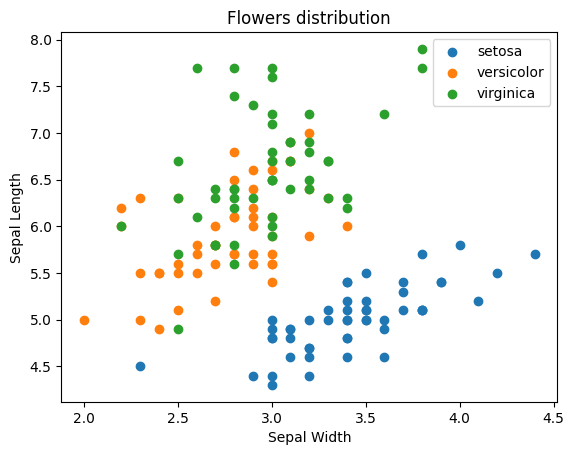

In [13]:
flower_types = iris.target_names
colors = ['red', 'blue', 'green']
fig1 = plt.figure()
for i in range(3):

    plt.scatter(iris_df[iris_df['Name']==flower_types[i]].sepal_width,iris_df[iris_df['Name']==flower_types[i]].sepal_length)

plt.legend(flower_types)
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Flowers distribution')



Pre-processing

In [6]:
from sklearn.preprocessing import StandardScaler
# Fixing categorcal feature
iris_df1 = fix_cats(iris_df)

# Choosing the input for out data
X = iris.data
t = iris_df1['setosa'].values

# # Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Shuffling the date
indices = np.arange(len(X))
np.random.shuffle(indices)
X_shuffled = X[indices]
t_shuffled = t[indices]

# Show new corrected table
iris_df1.head()

,sepal_length,sepal_width,petal_length,petal_width,Target,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0


In [7]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, t, test_size=0.2, random_state=42)

## With numpy

Model Training

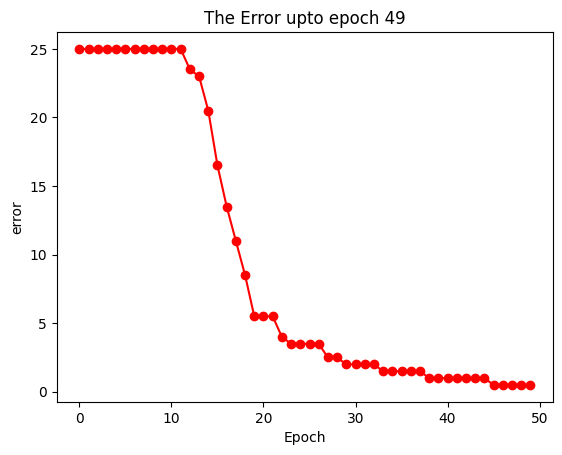

In [ ]:
# Seed setting
np.random.seed(69)

# Initialization
N_FEATURES = 4
W = np.random.rand(1,N_FEATURES)/10 - 0.5/10
b = np.random.rand(1)/10 - 0.5/10
error = np.array([])

for i in range(50):

    # Clearing any output to show the error graph
    clear_output(wait=True)

    # creating an empty array for yhat
    y_hat = np.zeros((iris_df.shape[0],))

    # Forward
    for d in range(iris_df.shape[0]):

        x = X[d,:]
        Z = np.dot(W,x) + b
        y_hat[d] = 1 if Z>=0.5 else 0

    # Error
    E = t-y_hat
    e = 1/2 * np.dot(E,E)
    error = np.append(error,e)

    # Update rule
    dj = np.dot(X.T,E)
    W = W + 0.0001*dj
    b = b + 0.0001*np.sum(E)

    # Plot error per epoch
    plt.plot(error,
             marker='o',
             markerfacecolor = 'red',
             color = 'red')
    plt.title(f'The Error upto epoch {i}')
    plt.ylabel('error')
    plt.xlabel('Epoch')
    plt.show()




Plotting features with the separating line

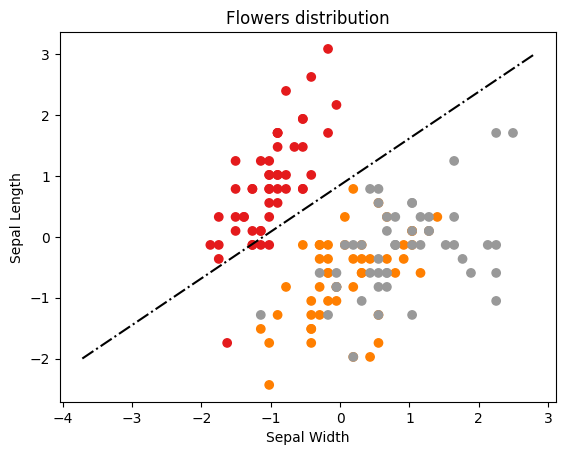

In [ ]:
import matplotlib.cm as cm

w = W.copy()
w = w.reshape((4,))
x0 = np.arange(-2,3,0.01)
x1 = -w[0]/w[1] * x0 - b/w[1]


# plt.scatter(X[:,1],X[:,0])

flower_types = iris.target_names
colors = ['red', 'blue', 'green']

plt.scatter(X[:,0], X[:,1], c=iris_df.Target.values, cmap='Set1')

# plt.legend(flower_types)
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Flowers distribution')

plt.plot(x1,x0,color='black',linestyle='-.')

## With TensorFlow

Adaline model with TensorFlow

In [9]:
# Adaline Layer
class Dense(tf.keras.layers.Layer):
    def __init__(self, units):
        super(Dense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            name="w",
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            name="b", shape=(self.units,), initializer="random_normal", trainable=True,
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

# Adaline model
class AdalineModel1(tf.keras.Model):
    def __init__ (self, n_classes=2):
        super(AdalineModel1,self).__init__()
        self.layer = Dense(1)

    def call(self,x):
        x = self.layer(x)
        return x

Creating callbacks for the model

In [24]:
from csv import writer
import os
# Custom Callback
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(CustomCallback, self).__init__()

    def on_train_begin(self,X):
        self.train_x = X_shuffled

    def on_epoch_end(self, epoch, logs=None):
        # Clearing any output to show the error graph
        # clear_output(wait=False)
        # print(self.train_x.shape)
        pass

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Save best weights
checkpoint_filepath = '/content/best.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

# Saving all of the weights in an array
class SaveAllWeights(tf.keras.callbacks.Callback):
    def __init__(self):
        super(SaveAllWeights,self).__init__()

    def on_train_begin(self,epoch):

        csv_path = 'weights.csv'
        try:

            os.remove(csv_path)
        except:

            pass

    def on_epoch_end(self,epoch,object):

        # Getting the weights
        w = self.model.weights[0].numpy()
        b = self.model.weights[1].numpy().reshape(1,1)

        # Putting the weights together
        W = tf.concat([w,b],0)
        W = tf.reshape(W,(-1,)).numpy()

        with open('weights.csv', 'a') as f_object:

            # Pass this file object to csv.writer()
            # and get a writer object
            writer_object = writer(f_object)

            # Pass the list as an argument into
            # the writerow()
            writer_object.writerow(W)

            # Close the file object
            f_object.close()




Train for Setosa

In [25]:
# Deleting the model if exists
try:
    del model1
except:
    pass

# Defining the model
model1 = AdalineModel1()

# Compile the model
model1.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

# Fitting the model with the given data
# model1.fit(X_train_m, y_train_m, epochs=10, batch_size=16, validation_data=(X_test_m, y_test_m))
history = model1.fit(X_shuffled, t_shuffled, epochs=150, batch_size=16, callbacks =[SaveAllWeights(), CustomCallback()],verbose=0)

Train for Virginica

In [26]:
# Target data for virginica type
t_v = iris_df1['virginica'].values
t_v_suffled = t_v[indices]

# Splitting for viriginica
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X, t_v, test_size=0.2, random_state=42)

# Deleting the model if exists
try:
    del model2
except:
    pass

# Defining the model
model2 = AdalineModel1()

# Compile the model
model2.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

# Fitting the model with the given data
# model2.fit(X_train_v, y_train_v, epochs=10, batch_size=16, validation_data=(X_test_v, y_test_v))
model2.fit(X_shuffled, t_shuffled, epochs=10, batch_size=16)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 5.1476 - accuracy: 0.6667
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 5.1429 - accuracy: 0.6667
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 5.1423 - accuracy: 0.6667
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 5.1421 - accuracy: 0.6667
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 5.1418 - accuracy: 0.6667
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 5.1416 - accuracy: 0.6667
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 5.1416 - accuracy: 0.6667
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 5.1416 - accuracy: 0.6667
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 5.1416 - accuracy: 0.6667
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 5.1416 - accuracy: 0.6667


## With Pytorch

In [27]:
class AdalinePytorch(nn.Module):
    def __init__(self, input_size):
        super(AdalinePytorch, self).__init__()
        self.weights = nn.Parameter(torch.rand(input_size, 1))  # Learnable weight parameter
        self.bias = nn.Parameter(torch.zeros(1))  # Learnable bias parameter

    def forward(self, x):
        # Linear combination (without activation function)
        return torch.matmul(x, self.weights) + self.bias

def initialize_weights(module):
    if isinstance(module, nn.Linear):
        nn.init.normal_(module.weights, mean=0, std=0.01)
        nn.init.zeros_(module.bias)

# Creating torch tensors for train data
X_torch = torch.FloatTensor(X)
y_torch = torch.FloatTensor(t)
dataset = data.TensorDataset(X_torch,y_torch)
bs = 8
data_loader = data.DataLoader(dataset,batch_size=bs, shuffle=True)

# Creating Adaline model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Setting the device to work on
input = 4
model3 = AdalinePytorch(input)

model3.apply(initialize_weights).to(device)

# Loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(),lr=0.001)

Loss = list([])
n_epochs = 1000
for epoch in range(n_epochs):
    # for batch, (X_batch,y_batch) in enumerate(data_loader):

        # Exporting the working data to cpu or gpu
        # X_batch = X_batch.to(device)
        # y_batch = y_batch.to(device)
        X_batch = X_torch.to(device)
        y_batch = y_torch.to(device)

        # Creating y-hat
        output = model3(X_batch)

        # Computing the loss
        loss = criterion(output.squeeze(), y_batch)
        Loss.append(loss.detach().numpy() )

        # BackPropagation
        optimizer.zero_grad() # ==> This method turns all gradients to 0
        loss.backward()
        optimizer.step()

Plotting the loss for model3

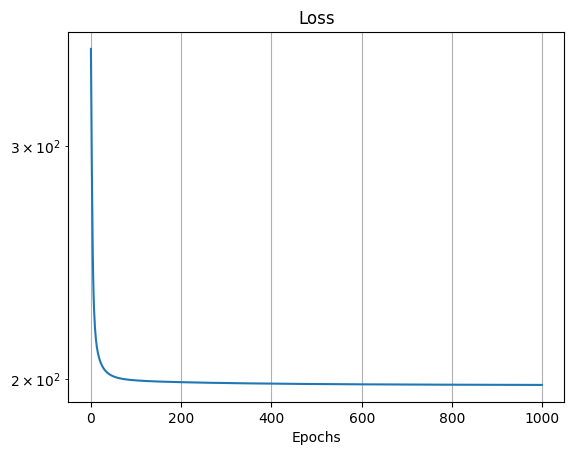

In [40]:
plt.plot(Loss)
plt.title('Loss')
plt.xlabel('Epochs')
plt.yscale('log')
plt.grid(True)

Testing the performance of the model on the training data

In [36]:
with torch.no_grad(): # no_grad is for the model not to calculate gradiants
    gradx = X_torch
    grady = y_torch

    model3.eval()   # Set model to eval so model is not used for training
    score = model3(gradx)
    prediction = torch.where(score >= 0.5, torch.tensor(1), torch.tensor(0))

model3_acc = torch.sum(torch.abs(prediction - y_batch))/len(y_batch)

print(f'The accuracy of the model3 for separating setosa is {model3_acc:.3f}%')
model3.train() # Setting the model back to training mode

The accuracy of the model3 for separating setosa is 67.667%


AdalinePytorch()

Saving the trained model

In [ ]:
path = '/content/pytorch_weights.pht'
torch.save(model3.state_dict(), path)

In [ ]:
abn = torch.load(path) # => This is how you load sth in pyrotch
# Because the model in created from scratch, you can not load weights on it

In [ ]:
model3.state_dict()['weights']

tensor([[-0.4645],
        [ 0.3805],
        [-0.5014],
        [-0.7692]])